In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

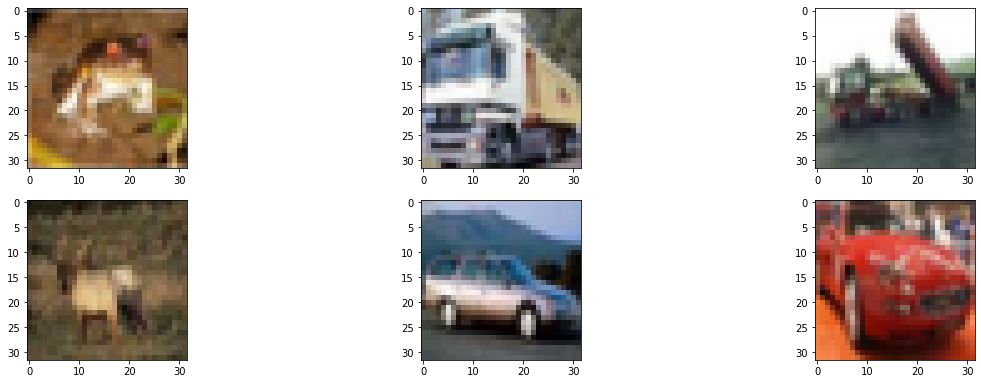

In [3]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [5]:
#convert pixel value
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [6]:
#1-hot encoding
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3), padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [9]:
#sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [11]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=30,batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 460s 294ms/step - loss: 1.2953 - acc: 0.5351 - val_loss: 0.9460 - val_acc: 0.6649
Epoch 2/30
1563/1563 [==============================] - 455s 291ms/step - loss: 0.8577 - acc: 0.6979 - val_loss: 0.7983 - val_acc: 0.7188
Epoch 3/30
1563/1563 [==============================] - 474s 303ms/step - loss: 0.6703 - acc: 0.7651 - val_loss: 0.8106 - val_acc: 0.7263
Epoch 4/30
1563/1563 [==============================] - 478s 306ms/step - loss: 0.5283 - acc: 0.8158 - val_loss: 0.7517 - val_acc: 0.7511
Epoch 5/30
1563/1563 [==============================] - 452s 289ms/step - loss: 0.3997 - acc: 0.8580 - val_loss: 0.8176 - val_acc: 0.7463
Epoch 6/30
1563/1563 [==============================] - 451s 288ms/step - loss: 0.3103 - acc: 0.8914 - val_loss: 0.8573 - val_acc: 0.7473
Epoch 7/30
1563/1563 [==============================] - 449s 287ms/step - loss: 0.2393 - acc: 0.9148 - val_loss: 1.0008 - val_acc: 0.7486
Epoch 8/30
1563/1563 [============

In [12]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 21s 67ms/step - loss: 1.8792 - acc: 0.7445
74.44999814033508


In [13]:
model.save("cifar10_model.h5")

In [14]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

In [17]:
from PIL import Image
import numpy as np
im=Image.open("demo.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

2 bird
